<a href="https://colab.research.google.com/github/zainabsaeed04072000-star/Deep-Learning_Practice/blob/main/Dog_Breed_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dog Breed Classification end to end Project🐕‍🦺🤑**
Deep Learning and neural networks🧷✅

In this project we're going to be using machine learning to help us identify different breeds of dogs. To do this, we'll be using data from the Kaggle dog breed identification competition. It consists of a collection of 10,000+ labelled images of 120 different dog breeds.

This kind of problem is called multi-class image classification. It's multi-class because we're trying to classify mutliple different breeds of dog. If we were only trying to classify dogs versus cats, it would be called binary classification (one thing versus another).

Multi-class image classification is an important problem because it's the same kind of technology Tesla uses in their self-driving cars or Airbnb uses in automatically adding information to their listings.

Since the most important step in a deep learning problem is getting the data ready (turning it into numbers), that's what we're going to start with.

We're going to go through the following TensorFlow/Deep Learning workflow:

Get data ready (download from Kaggle, store, import).
Prepare the data (preprocessing, the 3 sets, X & y).
Choose and fit/train a model (TensorFlow Hub, tf.keras.applications, TensorBoard, EarlyStopping).
Evaluating a model (making predictions, comparing them with the ground truth labels).
Improve the model through experimentation (start with 1000 images, make sure it works, increase the number of images).

In [1]:
import sys
sys.setrecursionlimit(10000)

# **Getting Data Ready**

In [2]:
from google.colab import files
files.upload()  # Upload kaggle.json here


Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"zainab0407","key":"644d30c34d366617134fe18bead9ffc5"}'}

In [3]:

!mkdir -p ~/.kaggle
!mv "kaggle (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json



In [4]:
!pip install kaggle

In [5]:
!kaggle --version

Kaggle API 1.7.4.5


In [6]:
!kaggle competitions download -c dog-breed-identification

dog-breed-identification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:

!unzip dog-breed-identification.zip -d dog_breed_data

Archive:  dog-breed-identification.zip
replace dog_breed_data/labels.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:
#checking out labels of our data
import pandas as pd
labels_csv = pd.read_csv("dog_breed_data/labels.csv")
print(labels_csv.describe())


                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126


Looking at this, we can clearly see that there are 10,222 rows i.e, 10,222 images.
And there are 120 unique dog breeds.
For if the most frequent value is fff43b07992508bc822f33d8ffd902ae and the most common breed is scottish_deerhound


<Axes: xlabel='breed'>

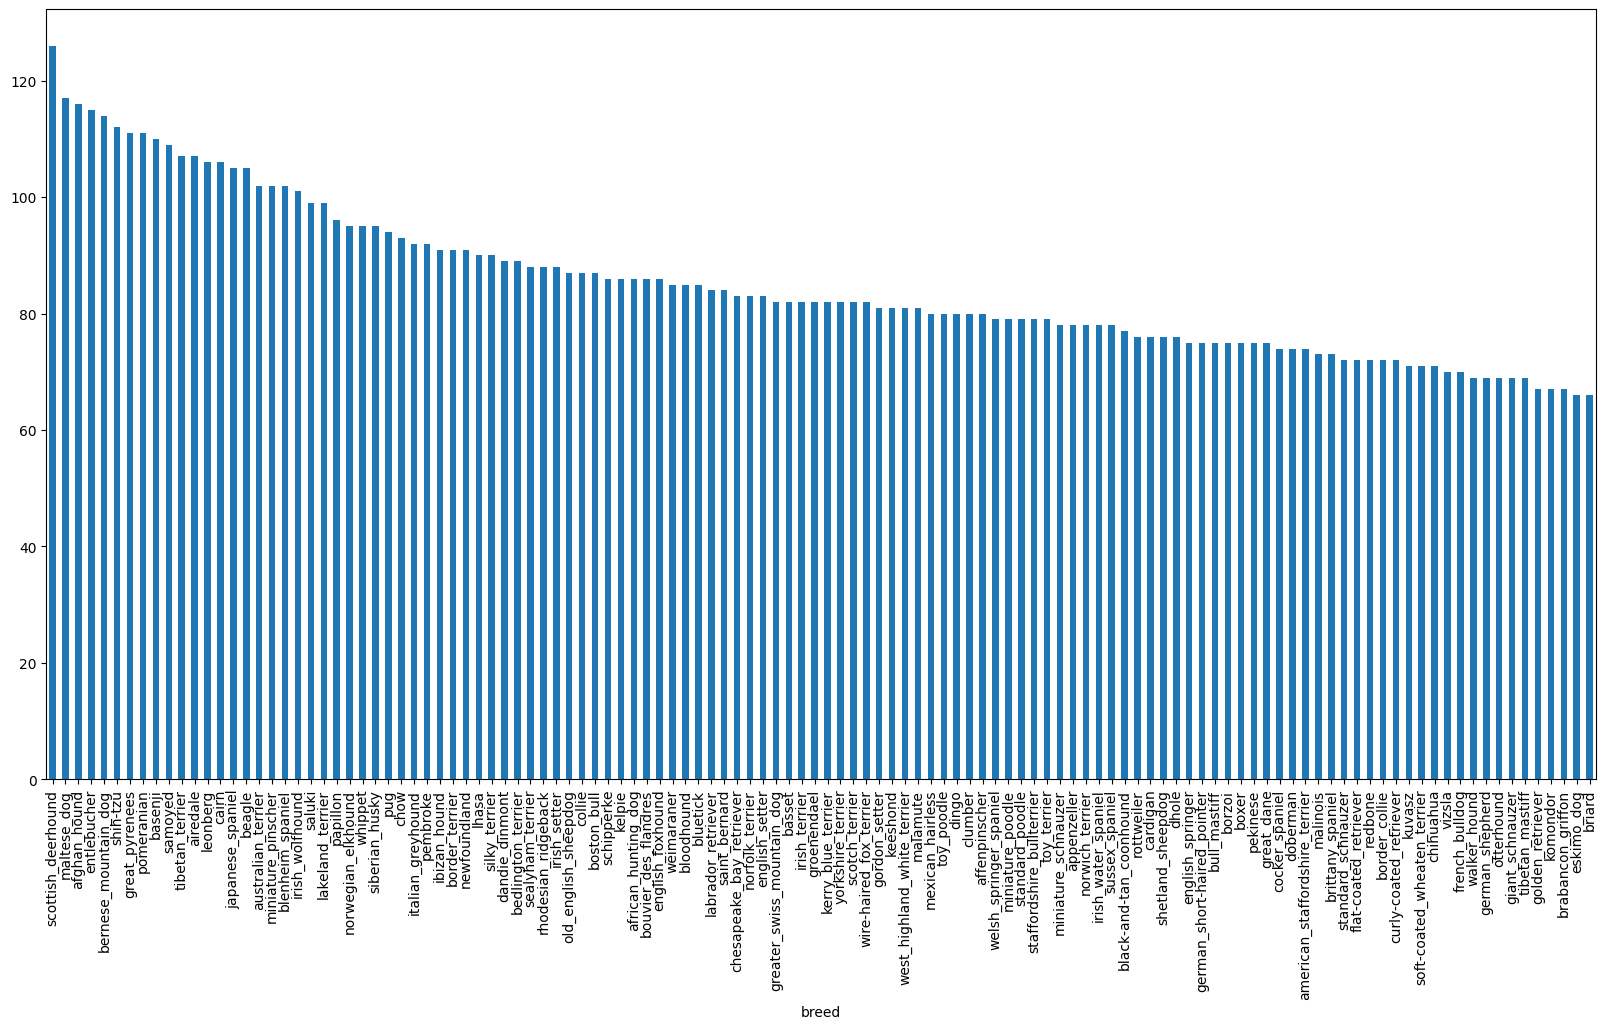

In [9]:
#How many images are there for each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

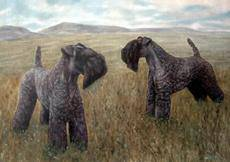

In [10]:
from IPython.display import display, Image

display(Image(filename="dog_breed_data/train/fd229a951f5a9f2439d4f6c2c51595e3.jpg"))

# **Getting Images and their labels**

Since, we've got the image ID's an d their labels in a Dataframe (labels.csv), we'll use it to create:

* A list a filepaths to training images
* An array of all labels
* An array of all unique labels


We'll only create a list of filepaths to images rather than importing them all to begin with. This is because working with filepaths (strings) is much efficient than working with images.

In [11]:
#create pathnames from image ID's

filenames = ["dog_breed_data/train/" + fname + ".jpg" for fname in labels_csv["id"]]

#checking the first 10 names
filenames[:10]

['dog_breed_data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'dog_breed_data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'dog_breed_data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'dog_breed_data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'dog_breed_data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'dog_breed_data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'dog_breed_data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'dog_breed_data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'dog_breed_data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'dog_breed_data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

Now we've got a list of all the filenames from ID column of labels_csv, we can compare it to the number of files in our training data directory to see if they line up.

If they do, great. If not, there may be isssue when unzipping the data(what we did above), to fix this, you might have to unzip the data again. Be careful not to let your colab notebook disconnect whilst unzipping.

In [12]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("dog_breed_data/train/")) == len(filenames):
  print("Filenames match actual amount of files!")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!


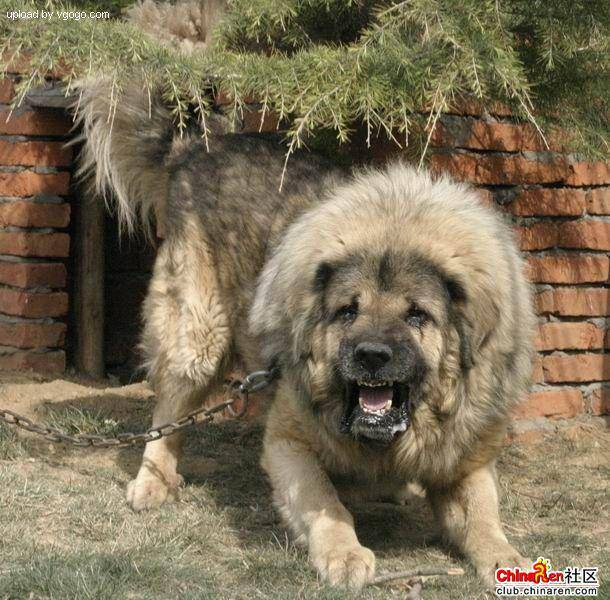

In [13]:
#check an image directly from a filepath

Image(filenames[9000])

Now we've got our image filepaths together, let's get the labels. We'll take them from labels_csv and turn them into a NumPy array.

In [14]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [15]:
#See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames")
else:
  print("Number of labels does not match number of filenames, check data dirtectories")

Number of labels matches number of filenames


In [16]:
#finding unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [17]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

The length of unique breeds should be 120, meaning we are working with the images of 120 different breeds of dogs.


Now use unique_breeds to help turn our labels array into an array of booleans

In [18]:
labels


array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [19]:
filenames

['dog_breed_data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'dog_breed_data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'dog_breed_data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'dog_breed_data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'dog_breed_data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'dog_breed_data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'dog_breed_data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'dog_breed_data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'dog_breed_data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'dog_breed_data/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'dog_breed_data/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'dog_breed_data/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 'dog_breed_data/train/00693b8bc2470375cc744a6391d397ec.jpg',
 'dog_breed_data/train/006cc3ddb9dc1bd827479569fcdc52dc.jpg',
 'dog_breed_data/train/0075dc49dab4024d12fafe67074d8a81.jpg',
 'dog_breed_data/train/00792e341f3c6eb33663e415d0715370.jpg',
 'dog_br

In [20]:
# Example: Turn one label into an array of booleans
print(labels[0])
labels[0] == unique_breeds # use comparison operator to create boolean array

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [21]:

# Turn every label into a boolean array
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

Why do it like this?

Remember, an important concept in machine learning is converting your data to numbers before passing it to a machine learning model.

In this case, we've transformed a single dog breed name such as boston_bull into a one-hot array.

Let's see an example.

In [22]:
# Example: Turning a boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])[0][0]) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs


boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


Now, we've got our labels in a numeric format and our image filepaths easily accessible (they aren't numeric yet), let's split our data up.

Creating our Own Validation Set

Since the dataset from Kaggle doesn't come with a validation set (a split of the data we can test our model on before making final predicitons on the test set), let's make one.

We could use Scikit-Learn's train_test_split function or we could simply make manual splits of the data.

For accessibility later, let's save our filenames variable to X (data) and our labels to y.

---



In [23]:
#Setup X and y variables
X = filenames
y = boolean_labels

Since we're working with 10,000+ images, it's a good idea to work with a portion of them to make sure things are working before training on them all.

This is because computing with 10,000+ images could take a fairly long time. And our goal when working through machine learning projects is to reduce the time between experiments.

Let's start experimenting with 1000 and increase it as we need.

In [24]:
#setting number of images to be used for experimenting
NUM_IMAGES = 1000
NUM_IMAGES

1000

Now let's split our data into training and validation sets. We'll use and 80/20 split (80% training data, 20% validation data).

In [25]:
#Import train_test_split from Scikit-learn

from sklearn.model_selection import train_test_split

#split them into training and validation using NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(8177, 8177, 2045, 2045)

In [26]:
len(X_train) == len(y_train)
len(X_val) == len(y_val)

True

In [27]:

# Check out the training data (image file paths and labels)
X_train[:5], y_train[:2]

(['dog_breed_data/train/ad019e394b55406f412b9a03899d5705.jpg',
  'dog_breed_data/train/c77266278126119fe02a3550dd0c3c1c.jpg',
  'dog_breed_data/train/ffe5f6d8e2bff356e9482a80a6e29aac.jpg',
  'dog_breed_data/train/75dbdbf6814e6c72a7cab75c73a5acd7.jpg',
  'dog_breed_data/train/16fdb4a145a7f5695a264ba980e23bc3.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False,

# **Processing images (turning images into Tensors)**


Our labels are in numeric format but our images are still just file paths.

Since we're using TensorFlow, our data has to be in the form of Tensors.

A Tensor is a way to represent information in numbers. If you're familar with NumPy arrays (you should be), a Tensor can be thought of as a combination of NumPy arrays, except with the special ability to be used on a GPU.

Because of how TensorFlow stores information (in Tensors), it allows machine learning and deep learning models to be run on GPUs (generally faster at numerical computing).

To preprocess our images into Tensors we're going to write a function which does a few things:

Takes an image filename as input.
Uses TensorFlow to read the file and save it to a variable, image.
Turn our image (a jpeg file) into Tensors.
Resize the image to be of shape (224, 224).
Return the modified image.


You might be wondering why (224, 224), which is (heigh, width). It's because this is the size of input our model (we'll see this soon) takes, an image which is (224, 224, 3).

What? Where's the 3 from? We're getting ahead of ourselves but that's the number of colour channels per pixel, red, green and blue.

Let's make this a little more concrete.

In [28]:
#convert image to Numpy array

from matplotlib.pyplot import imread
image = imread(filenames[42]) #load 43rd image, read in an image
image.shape

(257, 350, 3)

(257, 350, 3)
Notice the shape of image. It's (257, 350, 3). This is height, width, colour channel value.

And you can easily convert it to a Tensor using tf.constant().

In [29]:
import tensorflow as tf

tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [30]:
#define image size

IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image file path and convert it into tensor.
  """

  #Read in image file
  image = tf.io.read_file(image_path)
  #Turn the jpeg image into numerical Tensor with 3 colour channels(Red,Green,Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  #Convert the colour channel values from 0-255 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  #Resize the image to our desired size (244,244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image


# **Creating Data Batches**

Now we've got a function to convert our images into Tensors, we'll now build one to turn our data into batches (more specifically, a TensorFlow BatchDataset).

What's a batch?

A batch (also called mini-batch) is a small portion of your data, say 32 (32 is generally the default batch size) images and their labels. In deep learning, instead of finding patterns in an entire dataset at the same time, you often find them one batch at a time.

Let's say you're dealing with 10,000+ images (which we are). Together, these files may take up more memory than your GPU has. Trying to compute on them all would result in an error.

Instead, it's more efficient to create smaller batches of your data and compute on one batch at a time.

TensorFlow is very efficient when your data is in batches of (image, label) Tensors. So we'll build a function to do create those first. We'll take advantage of of process_image function at the same time.

In [31]:
#Create a simple function to return a tuple(image,label)

def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image,label)
  """

  image = process_image(image_path)
  return image, label

Now we've got a simple function to turn our image file path names and their associated labels into tuples (we can turn these into Tensors next), we'll create a function to make data batches.

Because we'll be dealing with 3 different sets of data (training, validation and test), we'll make sure the function can accomodate for each set.

We'll set a default batch size of 32 because according to Yann Lecun (one of the OG's of deep learning), friends don't let friends train with batch sizes over 32.

In [32]:

#Define the batch_size, 32 is a good default
BATCH_SIZE = 32

#Create a function to turn data into batches
def create_data_batches(x,y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data
  Also accepts test data as input (no labels).
  """

  #If the data is a test dataset, we probably don't have labels

  if test_data:
    print("Creating test data batches..")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) #only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  #If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), #filepaths
                                               tf.constant(y))) #labels

    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    #if the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    #Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), #filepaths
                                               tf.constant(y))) #labels

    #shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    #Create (image,label) tuples (this also turns the image_path into a preprocessed image), get_image_label to pair image tensors with labels
    data = data.map(get_image_label)

    #Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch




In [33]:

#create training and validation data batches
train_data = create_data_batches(X_train,y_train)
val_data = create_data_batches(X_val,y_val, valid_data=True)

Creating training data batches...
Creating validation data batches


In [34]:
#check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

Look at that! We've got our data in batches, more specifically, they're in Tensor pairs of (images, labels) ready for use on a GPU.

But having our data in batches can be a bit of a hard concept to understand. Let's build a function which helps us visualize what's going on under the hood.

Visualizing data batches

In [35]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")


To make computation efficient, a batch is a tighly wound collection of Tensors.

So to view data in a batch, we've got to unwind it.

We can do so by calling the as_numpy_iterator() method on a data batch.

This will turn our a data batch into something which can be iterated over.

Passing an iterable to next() will return the next item in the iterator.

In our case, next will return a batch of 32 images and label pairs.

Note: Running the cell below and loading images may take a little while.

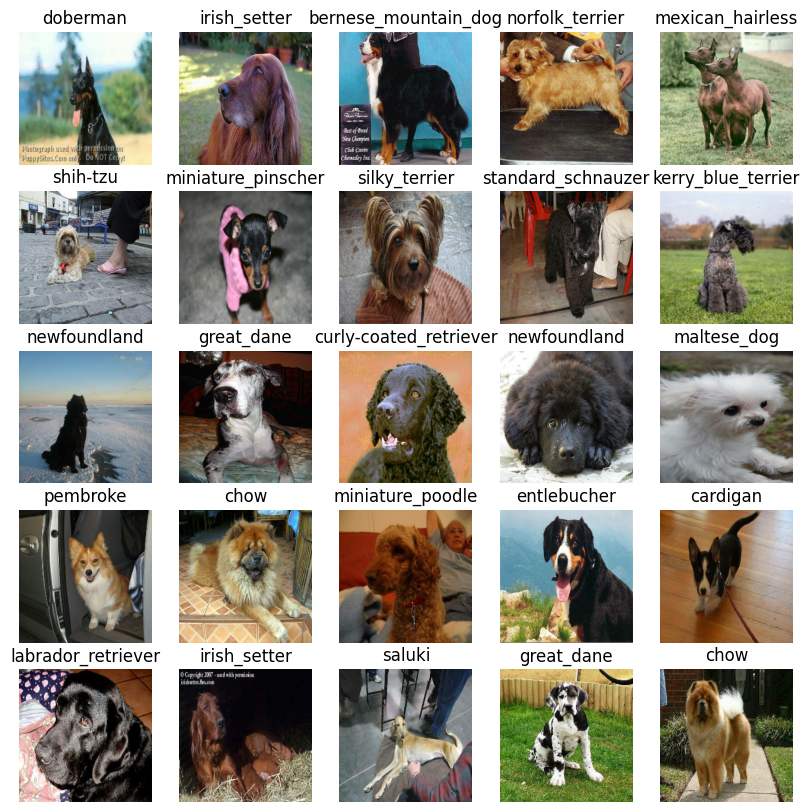

In [36]:
#visualizing training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

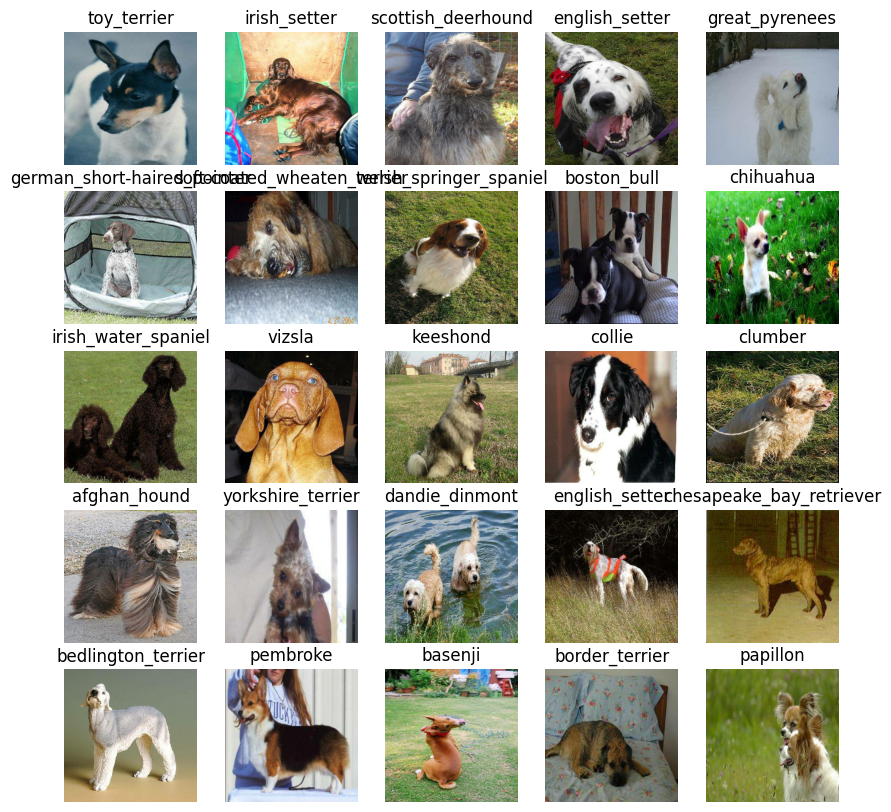

In [37]:
#visualize validation images from the validation data batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

# **Creating and training a model**

Now our data is ready, let's prepare it modelling. We'll use an existing model from TensorFlow Hub.

TensorFlow Hub is a resource where you can find pretrained machine learning models for the problem you're working on.

Using a pretrained machine learning model is often referred to as transfer learning.

***Why use a pretrained model?***

Building a machine learning model and training it on lots from scratch can be expensive and time consuming.

Transfer learning helps eliviate some of these by taking what another model has learned and using that information with your own problem.


**How do we choose a model?**

Since we know our problem is image classification (classifying different dog breeds), we can navigate the TensorFlow Hub page by our problem domain (image).

We start by choosing the image problem domain, and then can filter it down by subdomains, in our case, image classification.

Doing this gives a list of different pretrained models we can apply to our task.

Clicking on one gives us information about the model as well as instructions for using it.

For example, clicking on the mobilenet_v2_130_224 model, tells us this model takes an input of images in the shape 224, 224. It also says the model has been trained in the domain of image classification.

Let's try it out.

# **Building a model**

Before we build a model, there are a few things we need to define:

* The input shape (images, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use.

These things will be standard practice with whatever machine learning model you use. And because we're using TensorFlow, everything will be in the form of Tensors.


In [38]:

#Setup input shape to the model
INPUT_SHAPE = (None, IMG_SIZE, IMG_SIZE, 3)#batch, height, width, color channels

#Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds)

#Setup model URL from TensorFlow Hub
MODEL_URL =  "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Now we've got the inputs, outputs and model we're using ready to go. We can start to put them together

There are many ways of building a model in TensorFlow but one of the best ways to get started is to use the Keras API.

Defining a deep learning model in Keras can be as straightforward as saying, "here are the layers of the model, the input shape and the output shape, let's go!"

Knowing this, let's create a function which:

* Takes the input shape, output shape and the model we've chosen's URL as parameters.
* Defines the layers in a Keras model in a sequential fashion (do this first, then this, then that).
* Compiles the model (says how it should be evaluated and improved).
* Builds the model (tells it what kind of input shape it'll be getting).
* Returns the model.

We'll take a look at the code first, then dicuss each part.

In [39]:
!pip install --upgrade tensorflow


In [40]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

def create_model(input_shape=(224, 224, 3), output_shape=120):
    # Load MobileNetV2 base model without the top classifier
    base_model = MobileNetV2(input_shape=input_shape,
                             include_top=False,
                             weights='imagenet')
    base_model.trainable = False  # Freeze base model



    # Add custom layers on top
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(output_shape, activation='softmax')(x)



    # Create the full model
    model = Model(inputs=base_model.input, outputs=output)
    return model

# Example usage:
model = create_model()


In [41]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

#Setting up the model layers

There are two ways to do this in Keras, the functional and sequential API. We've used the sequential.

Which one should you use?

The Keras documentation states the functional API is the way to go for defining complex models but the sequential API (a linear stack of layers) is perfectly fine for getting started, which is what we're doing.

The first layer we use is the model from TensorFlow Hub (hub.KerasLayer(MODEL_URL). So our first layer is actually an entire model (many more layers). This input layer takes in our images and finds patterns in them based on the patterns mobilenet_v2_130_224 has found.

The next layer (tf.keras.layers.Dense()) is the output layer of our model. It brings all of the information discovered in the input layer together and outputs it in the shape we're after, 120 (the number of unique labels we have).

The activation="softmax" parameter tells the output layer, we'd like to assign a probability value to each of the 120 labels somewhere between 0 & 1. The higher the value, the more the model believes the input image should have that label. If we were working on a binary classification problem, we'd use activation="sigmoid".

For more on which activation function to use, see the article Which Loss and Activation Functions Should I Use?


**Compiling the model**

This one is best explained with a story.

Let's say you're at the international hill descending championships. Where your start standing on top of a hill and your goal is to get to the bottom of the hill. The catch is you're blindfolded.

Luckily, your friend Adam is standing at the bottom of the hill shouting instructions on how to get down.

At the bottom of the hill there's a judge evaluating how you're doing. They know where you need to end up so they compare how you're doing to where you're supposed to be. Their comparison is how you get scored.

Transferring this to model.compile() terminology:

* loss - The height of the hill is the loss function, the models goal is to minimize this, getting to 0 (the bottom of the hill) means the model is learning perfectly.
* optimizer - Your friend Adam is the optimizer, he's the one telling you how to navigate the hill (lower the loss function) based on what you've done so far. His name is Adam because the Adam optimizer is a great general which performs well on most models. Other optimizers include RMSprop and Stochastic Gradient Descent.
* metrics - This is the onlooker at the bottom of the hill rating how well your perfomance is. Or in our case, giving the accuracy of how well our model is predicting the correct image label.

# **Building the model**

We use model.build() whenever we're using a layer from TensorFlow Hub to tell our model what input shape it can expect.

In this case, the input shape is [None, IMG_SIZE, IMG_SIZE, 3] or [None, 224, 224, 3] or [batch_size, img_height, img_width, color_channels].

Batch size is left as None as this is inferred from the data we pass the model. In our case, it'll be 32 since that's what we've set up our data batches as.

Now we've gone through each section of the function, let's use it to create a model.

We can call summary() on our model to get idea of what our model looks like.

In [42]:
#create a model a and check its details
model = create_model()
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,437,432 (9.30 MB)

 Trainable params: 179,448 (700.97 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

# **Creating callbacks**
We've got a model ready to go but before we train it we'll make some callbacks.

Callbacks are helper functions a model can use during training to do things such as save a models progress, check a models progress or stop training early if a model stops improving.

The two callbacks we're going to add are a TensorBoard callback and an Early Stopping callback.

# **TensorBoard Callback**
TensorBoard helps provide a visual way to monitor the progress of your model during and after training.

It can be used directly in a notebook to track the performance measures of a model such as loss and accuracy.

To set up a TensorBoard callback and view TensorBoard in a notebook, we need to do three things:

* Load the TensorBoard notebook extension.
* Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function.
* Visualize the our models training logs using the %tensorboard magic function (we'll do this later on).


In [43]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [44]:

import datetime
import os
import tensorflow as tf

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("/content/drive/MyDrive/Dog vision project/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

# **Early Stopping Callback**
Early stopping helps prevent overfitting by stopping a model when a certain evaluation metric stops improving. If a model trains for too long, it can do so well at finding patterns in a certain dataset that it's not able to use those patterns on another dataset it hasn't seen before (doesn't generalize).

It's basically like saying to our model, "keep finding patterns until the quality of those patterns starts to go down."

In [45]:



# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

# **Training a model (on a subset of data)**

Our first model is only going to be trained on 1000 images. Or trained on 800 images and then validated on 200 images, meaning 1000 images total or about 10% of the total data.

We do this to make sure everything is working. And if it is, we can step it up later and train on the entire training dataset.

The final parameter we'll define before training is NUM_EPOCHS (also known as number of epochs).

NUM_EPOCHS defines how many passes of the data we'd like our model to do. A pass is equivalent to our model trying to find patterns in each dog image and see which patterns relate to each label.

If NUM_EPOCHS=1, the model will only look at the data once and will probably score badly because it hasn't a chance to correct itself. It would be like you competing in the international hill descent championships and your friend Adam only being able to give you 1 single instruction to get down the hill.

What's a good value for NUM_EPOCHS?

This one is hard to say. 10 could be a good start but so could 100. This is one of the reasons we created an early stopping callback. Having early stopping setup means if we set NUM_EPOCHS to 100 but our model stops improving after 22 epochs, it'll stop training.

Along with this, let's quickly check if we're still using a GPU.

In [46]:

# How many rounds should we get the model to look through the data?
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

Boom! We've got a GPU running and NUM_EPOCHS setup. Let's create a simple function which trains a model. The function will:

Create a model using create_model().
Setup a TensorBoard callback using create_tensorboard_callback() (we do this here so it creates a log directory of the current date and time).
Call the fit() function on our model passing it the training data, validatation data, number of epochs to train for and the callbacks we'd like to use.
Return the fitted model.

In [47]:

# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  model.compile(
      loss="categorical_crossentropy",
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])

  return model


Note: When training a model for the first time, the first epoch will take a while to load compared to the rest. This is because the model is getting ready and the data is being initialised. Using more data will generally take longer, which is why we've started with ~1000 images. After the first epoch, subsequent epochs should take a few seconds.

In [48]:

# Fit the model to the data
model = train_model()

Epoch 1/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 74s 185ms/step - accuracy: 0.3210 - loss: 3.1354 - val_accuracy: 0.7105 - val_loss: 1.0199
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.7732 - loss: 0.7478 - val_accuracy: 0.7139 - val_loss: 0.9321
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 19s 72ms/step - accuracy: 0.8558 - loss: 0.4841 - val_accuracy: 0.7188 - val_loss: 0.9265
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.8952 - loss: 0.3531 - val_accuracy: 0.7281 - val_loss: 0.9070
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 19s 73ms/step - accuracy: 0.9421 - loss: 0.2249 - val_accuracy: 0.7433 - val_loss: 0.8896
Epoch 6/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - accuracy: 0.9647 - loss: 0.1645 - val_accuracy: 0.7428 - val_loss: 0.9060
Epoch 7/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - accuracy: 0.9756 - loss: 0.1170 - val_accuracy: 0.7374 - val_loss: 0.9215
Epoch 8/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 18s 69ms/step - accuracy: 0.9905 - loss: 

# **Making and evaluating predictions using a trained model**
Before we scale up and train on more data, let's see some other ways we can evaluate our model. Because although accuracy is a pretty good indicator of how our model is doing, it would be even better if we could could see it in action.

Making predictions with a trained model is as calling predict() on it and passing it data in the same format the model was trained on.

In [49]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go
predictions


64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step


array([[3.4028886e-07, 1.8884116e-08, 7.8411040e-07, ..., 2.9873854e-07,
        4.6015006e-07, 3.8938506e-06],
       [3.8650205e-06, 8.9739682e-05, 3.4581971e-10, ..., 3.1173060e-09,
        2.0071778e-10, 5.5356861e-07],
       [1.3263355e-07, 1.0491197e-05, 2.3252418e-09, ..., 2.6132804e-07,
        2.0473752e-08, 3.2618889e-08],
       ...,
       [2.4657249e-08, 5.7047237e-07, 5.5727911e-09, ..., 1.3579685e-07,
        9.0457748e-09, 2.8016773e-06],
       [1.4187913e-12, 2.9621789e-09, 1.4937254e-12, ..., 6.7141115e-10,
        6.9505538e-12, 2.3568543e-12],
       [7.1843010e-07, 4.9862228e-06, 4.2456762e-07, ..., 1.6060383e-05,
        2.8761593e-07, 3.9186684e-08]], dtype=float32)

In [50]:

# Check the shape of predictions
predictions.shape

(2045, 120)

In [51]:

# First prediction
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}") # the predicted label

[3.4028886e-07 1.8884116e-08 7.8411040e-07 2.6622235e-08 4.2693795e-09
 1.9966985e-05 3.8834332e-06 3.3251854e-04 5.2226162e-10 1.4389608e-05
 3.4647254e-08 8.2282950e-06 4.7207386e-06 9.7412794e-08 3.2514063e-09
 5.3824683e-06 1.0588968e-08 3.9403545e-08 2.0774349e-08 7.5458389e-05
 2.0958171e-09 9.4106076e-07 4.3947708e-07 1.0960015e-08 8.5022663e-08
 4.4401949e-10 6.5832290e-07 1.8226384e-06 3.8431835e-09 2.4129132e-02
 4.9945719e-09 2.5900071e-10 1.4479803e-09 1.1450420e-06 7.9624296e-10
 3.1006679e-09 5.8512319e-07 3.1886677e-07 5.0341128e-04 7.1581269e-07
 6.5607622e-08 4.3819597e-09 3.9599590e-06 3.5872240e-06 2.3188627e-09
 1.1664084e-06 1.7493741e-06 2.4131232e-08 1.0133336e-09 2.4634355e-09
 1.2133640e-05 1.3833879e-07 6.0363050e-08 3.8109656e-06 2.8040788e-06
 2.5982556e-06 5.0793591e-07 2.0129622e-08 9.0978949e-09 7.2427602e-09
 5.6378340e-05 2.5268255e-07 3.7807638e-06 1.3159384e-06 9.9980690e-09
 1.3435979e-07 3.6925947e-08 5.8143348e-07 2.5025398e-07 1.0878386e-10
 6.072

Having this information is great but it would be even better if we could compare a prediction to its true label and original image.

To help us, let's first build a little function to convert prediction probabilities into predicted labels.

Note: Prediction probabilities are also known as confidence levels.

In [52]:

# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label


'toy_terrier'

Wonderful! Now we've got a list of all different predictions our model has made, we'll do the same for the validation images and validation labels.

Remember, the model hasn't trained on the validation data, during the fit() function, it only used the validation data to evaluate itself. So we can use the validation images to visually compare our models predictions with the validation labels.

Since our validation data (val_data) is in batch form, to get a list of validation images and labels, we'll have to unbatch it (using unbatch()) and then turn it into an iterator using as_numpy_iterator().

Let's make a small function to do so.

In [53]:

# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]


(array([[[0.4615459 , 0.5478204 , 0.60272235],
         [0.4615459 , 0.5478204 , 0.60272235],
         [0.45909494, 0.5453694 , 0.60027134],
         ...,
         [0.41813728, 0.5083334 , 0.56323534],
         [0.4156863 , 0.5058824 , 0.56078434],
         [0.4156863 , 0.5058824 , 0.56078434]],
 
        [[0.45522588, 0.5415004 , 0.59640235],
         [0.45522588, 0.5415004 , 0.59640235],
         [0.4527749 , 0.5390494 , 0.59395134],
         ...,
         [0.41813728, 0.5083334 , 0.56323534],
         [0.4156863 , 0.5058824 , 0.56078434],
         [0.4156863 , 0.5058824 , 0.56078434]],
 
        [[0.45098042, 0.5372549 , 0.5921569 ],
         [0.45098042, 0.5372549 , 0.5921569 ],
         [0.44852945, 0.5348039 , 0.5897059 ],
         ...,
         [0.41813728, 0.5083334 , 0.56323534],
         [0.4156863 , 0.5058824 , 0.56078434],
         [0.4156863 , 0.5058824 , 0.56078434]],
 
        ...,
 
        [[0.18869358, 0.32987005, 0.42398772],
         [0.1894466 , 0.33062306, 0.42179

Nailed it!

Now we've got ways to get:

Prediction labels
Validation labels (truth labels)
Validation images
Let's make some functions to make these all a bit more visualize.

More specifically, we want to be able to view an image, its predicted label and its actual label (true label).

The first function we'll create will:

Take an array of prediction probabilities, an array of truth labels, an array of images and an integer.
Convert the prediction probabilities to a predicted label.
Plot the predicted label, its predicted probability, the truth label and target image on a single plot.

In [54]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)


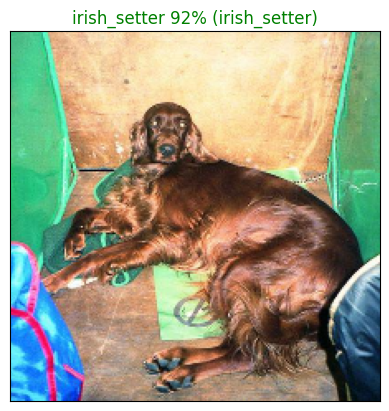

In [55]:

# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

Nice! Making functions to help visual your models results are really helpful in understanding how your model is doing.

Since we're working with a multi-class problem (120 different dog breeds), it would also be good to see what other guesses our model is making. More specifically, if our model predicts a certain label with 24% probability, what else did it predict?

Let's build a function to demonstrate. The function will:

Take an input of a prediction probabilities array, a ground truth labels array and an integer.
Find the predicted label using get_pred_label().
Find the top 10:
Prediction probabilities indexes
Prediction probabilities values
Prediction labels
Plot the top 10 prediction probability values and labels, coloring the true label green.

In [56]:

def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass


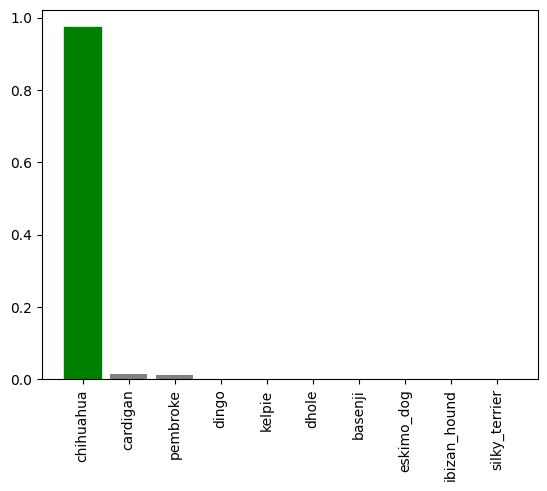

In [57]:

plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

Wonderful! Now we've got some functions to help us visualize our predictions and evaluate our model, let's check out a few.

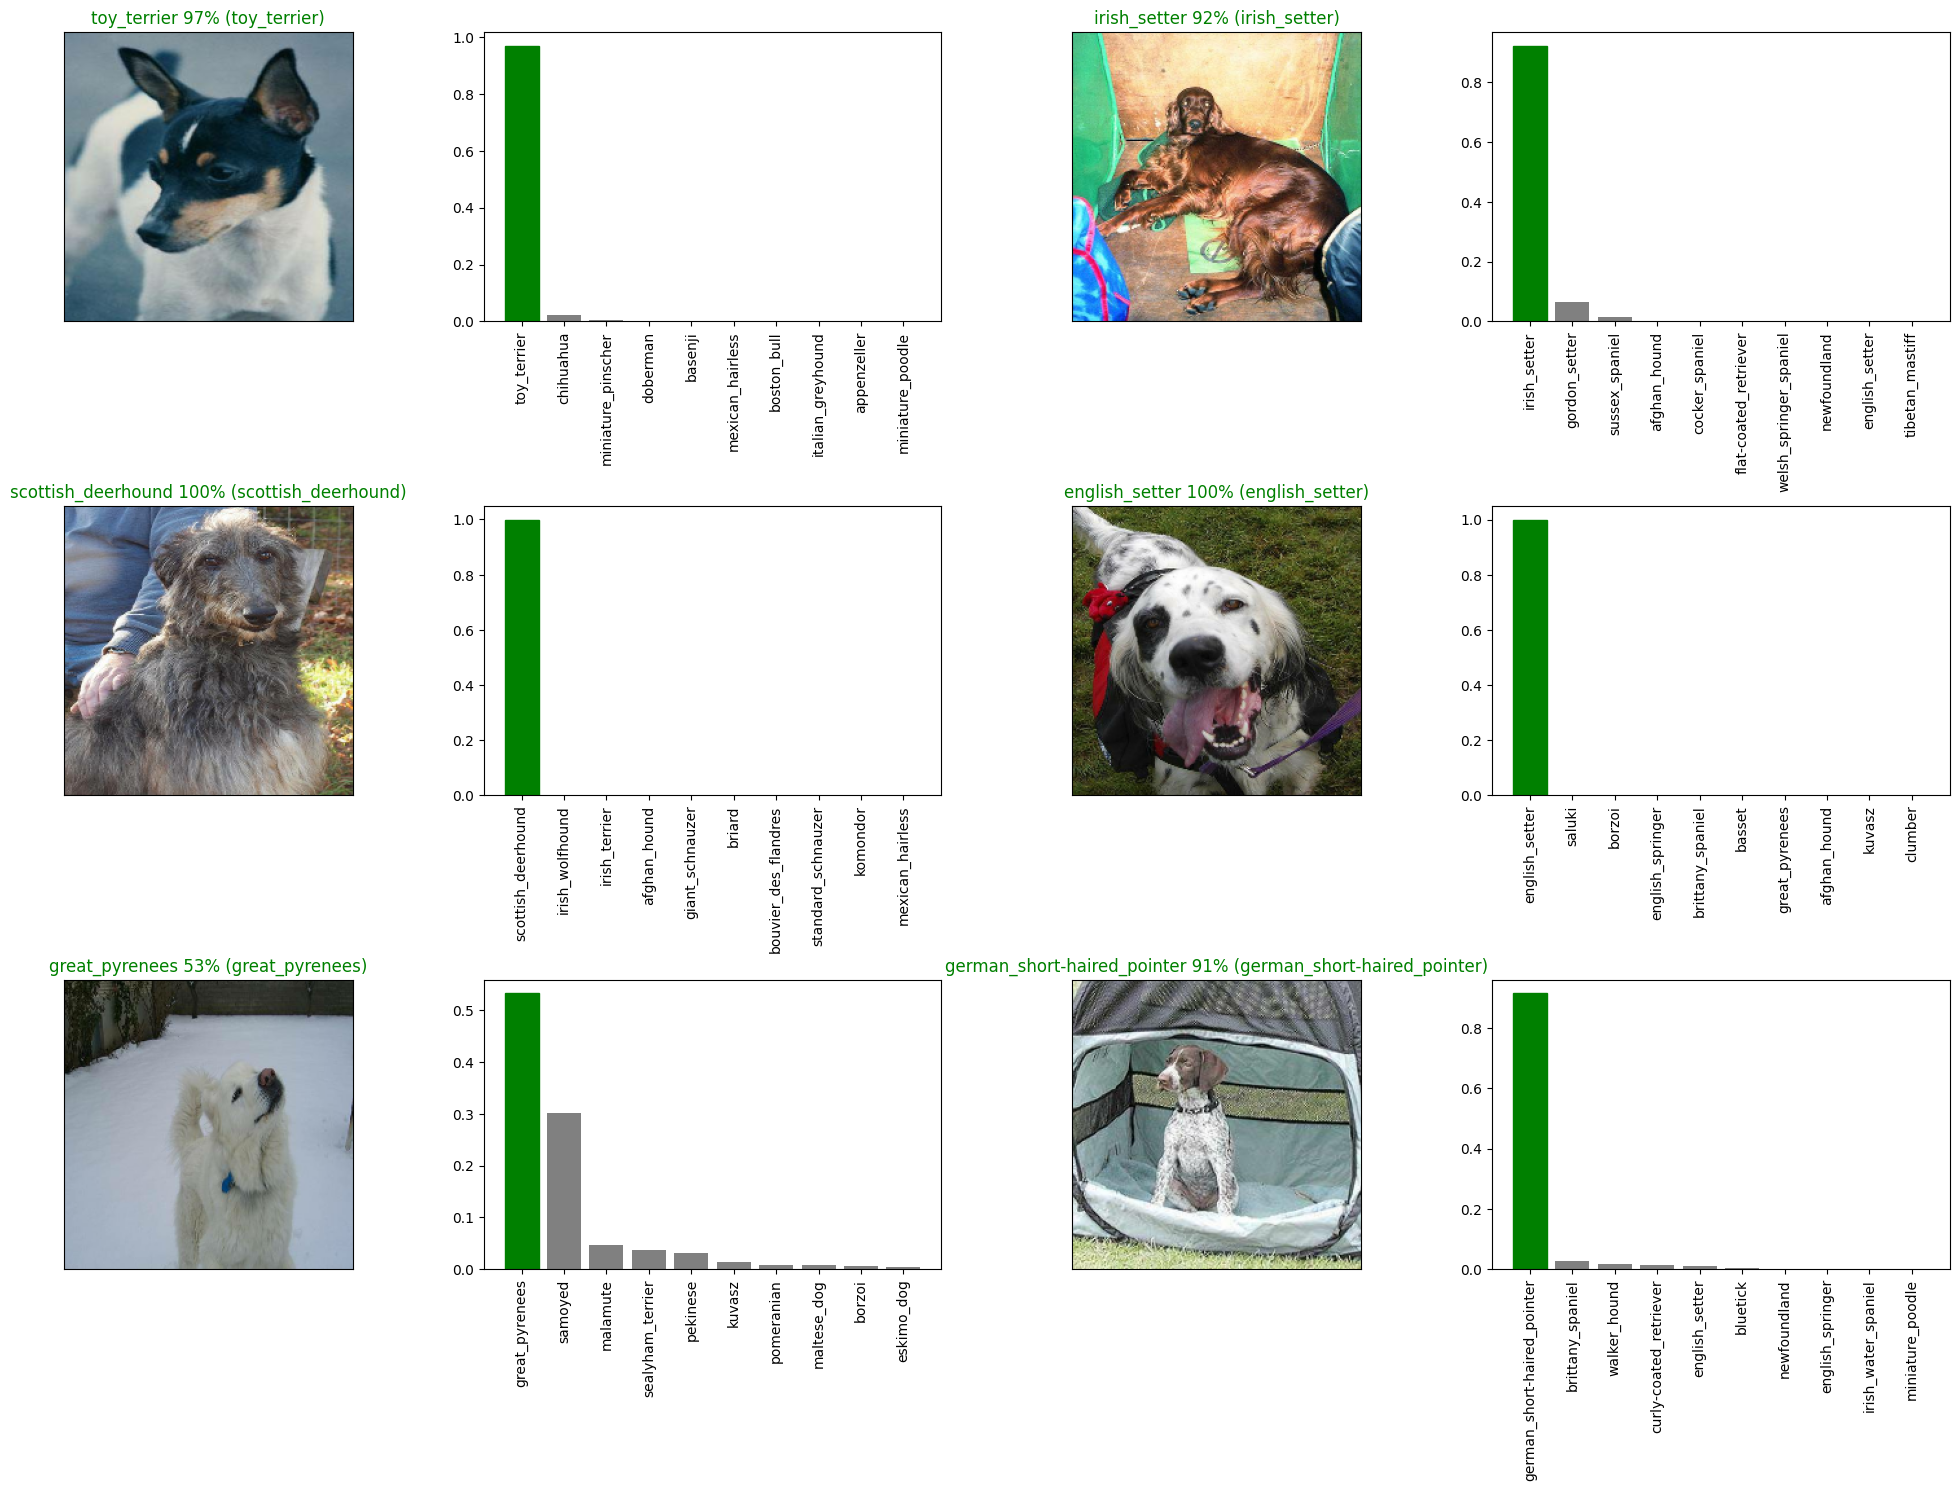

In [58]:

# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

# **Saving and reloading a model**

After training a model, it's a good idea to save it. Saving it means you can share it with colleagues, put it in an application and more importantly, won't have to go through the potentially expensive step of retraining it.

The format of an entire saved Keras model is h5. So we'll make a function which can take a model as input and utilise the save() method to save it as a h5 file to a specified directory.

In [59]:

def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("/content/drive/MyDrive/Dog vision project/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

If we've got a saved model, we'd like to load it, let's create a function which can take a model path and use the tf.keras.models.load_model() function to load it into the notebook.

Because we're using a component from TensorFlow Hub (hub.KerasLayer) we'll have to pass this as a parameter to the custom_objects parameter.

In [60]:

def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [61]:

# Save the trained model in /content
model.save("/content/dog_breed_model.h5")

# Verify it exists
!ls /content



dog_breed_data		      dog_breed_model.h5  sample_data
dog-breed-identification.zip  drive


In [62]:

from tensorflow.keras.models import load_model
import tensorflow_hub as hub

model_1000_images = load_model("/content/dog_breed_model.h5",
                                custom_objects={"KerasLayer": hub.KerasLayer})


Compare the two models (the original one and loaded one). We can do so easily using the evaluate() method

In [63]:
# Evaluate the pre-saved model
model.evaluate(val_data)

64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.7294 - loss: 0.9543


[0.9474678635597229, 0.7354522943496704]

In [64]:
# Evaluate the loaded model
model_1000_images.evaluate(val_data)

64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 102ms/step - accuracy: 0.7294 - loss: 0.9543


[0.9474678635597229, 0.7354522943496704]

# **Training a model (on the full data)**

Now we know our model works on a subset of the data, we can start to move forward with training one on the full data.

Above, we saved all of the training filepaths to X and all of the training labels to y. Let's check them out.

In [65]:
# Remind ourselves of the size of the full dataset
len(X), len(y)

(10222, 10222)

There we go! We've got over 10,000 images and labels in our training set.

Before we can train a model on these, we'll have to turn them into a data batch.

The beautiful thing is, we can use our create_data_batches() function from above which also preprocesses our images for us (thank you past us for writing a helpful function).

In [66]:
# Turn full training data in a data batch
full_data = create_data_batches(X, y)

Creating training data batches...


Our data is in a data batch, all we need now is a model.

And surprise, we've got a function for that too! Let's use create_model() to instantiate another model.

In [67]:
# Instantiate a new model for training on the full dataset
full_model = create_model()

In [68]:
# Create full model callbacks

# TensorBoard callback
full_model_tensorboard = create_tensorboard_callback()

# Early stopping callback
# Note: No validation set when training on all the data, therefore can't monitor validation accruacy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)


To monitor the model whilst it trains, we'll load TensorBoard (it should update every 30-seconds or so whilst the model trains).

In [69]:
%tensorboard --logdir /content/drive/MyDrive/Dog vision project/logs

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]
                   [--grpc_data_provider PORT] [--purge_orphaned_data BOOL]
                   [--db URI] [--db_import] [--inspect] [--version_tb]
                   [--tag TAG] [--event_file PATH] [--path_prefix PATH]
                   [--window_title TEXT] [--max_reload_threads COUNT]
                   [--reload_interval SECONDS] [--reload_task TYPE]
                   [--reload_multifile BOOL]
                   [--reload_multifile_inactive_secs SECONDS]
                   [--generic_data TYPE]
                   [--samples_per_plugin SAMPLES_PER_PLUGIN]
                   [-

Note: Since running the cell below will cause the model to train on all of the data (10,000+) images, it may take a fairly long time to get started and finish. However, thanks to our full_model_early_stopping callback, it'll stop before it starts going too long.

Remember, the first epoch is always the longest as data gets loaded into memory. After it's there, it'll speed up.

In [70]:
# Compile the model
full_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fit the model
full_model.fit(
    x=full_data,
    epochs=NUM_EPOCHS,
    callbacks=[full_model_tensorboard, full_model_early_stopping]
)


Epoch 1/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 36s 85ms/step - accuracy: 0.3746 - loss: 2.8416
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - accuracy: 0.7812 - loss: 0.7219
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.8517 - loss: 0.4738
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.8958 - loss: 0.3378
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.9297 - loss: 0.2450
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - accuracy: 0.9513 - loss: 0.1829
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - accuracy: 0.9710 - loss: 0.1224
Epoch 8/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.9836 - loss: 0.0900
Epoch 9/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.9872 - loss: 0.0694
Epoch 10/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.9949 - loss: 0.0457
Epoch 11/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.9917 - loss: 0.0465
Epoch 12/100
320/32

# **Saving and reloading the full model**
Even on a GPU, our full model took a while to train. So it's a good idea to save it.

We can do so using our save_model() function.

Challenge: It may be a good idea to incorporate the save_model() function into a train_model() function. Or look into setting up a checkpoint callback.

In [71]:
# Save model to file
save_model(full_model, suffix="all-images-Adam")

Saving model to: /content/drive/MyDrive/Dog vision project/models/20251201-07541764575676-all-images-Adam.h5...


'/content/drive/MyDrive/Dog vision project/models/20251201-07541764575676-all-images-Adam.h5'

In [72]:
# Load in the full model
loaded_full_model = load_model('/content/dog_breed_model.h5')


# **Making predictions on the test dataset**
Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we created create_data_batches() earlier which can take a list of filenames as input and convert them into Tensor batches.

To make predictions on the test data, we'll:

Get the test image filenames.
Convert the filenames into test data batches using create_data_batches() and setting the test_data parameter to True (since there are no labels with the test images).
Make a predictions array by passing the test data batches to the predict() function.

In [73]:

import os

test_path = "/content/dog_breed_data/test/"
test_filenames = [os.path.join(test_path, fname) for fname in os.listdir(test_path)]
test_filenames[:10]


['/content/dog_breed_data/test/dde1bc55cec2ac068cb9822928e67461.jpg',
 '/content/dog_breed_data/test/d32ac5f690eb971c879f645125954ac7.jpg',
 '/content/dog_breed_data/test/5de51bbe456c805ced8c5f302a89067c.jpg',
 '/content/dog_breed_data/test/485e1214e6a9c191d7c270777d084302.jpg',
 '/content/dog_breed_data/test/095aeed9500cd0916d0f8e0a39fd3677.jpg',
 '/content/dog_breed_data/test/c36ca7ca7d49703b30d04a41064b28f8.jpg',
 '/content/dog_breed_data/test/deb66780609abfef7f5048df02149839.jpg',
 '/content/dog_breed_data/test/52218b90dec5f5411494a592ba356c6d.jpg',
 '/content/dog_breed_data/test/53b689d150cded9b764db12339352284.jpg',
 '/content/dog_breed_data/test/e386eaa78980be7183ecfdd32ecd2aab.jpg']

In [74]:
# How many test images are there?
len(test_filenames)


10357

In [75]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches..


Note: Since there are 10,000+ test images, making predictions could take a while, even on a GPU. So beware running the cell below may take up to an hour.

In [76]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 ━━━━━━━━━━━━━━━━━━━━ 36s 99ms/step


In [77]:
# Check out the test predictions
test_predictions[:10]

array([[1.1019248e-08, 2.0413450e-08, 7.5255222e-08, ..., 5.9732963e-07,
        7.7980138e-07, 4.9118057e-08],
       [9.3886844e-04, 3.1551505e-07, 1.6176955e-07, ..., 2.6024729e-08,
        1.9941699e-06, 6.0890824e-07],
       [2.0211721e-07, 4.1255921e-06, 6.3957219e-07, ..., 3.0380972e-02,
        1.9379248e-05, 3.1966760e-09],
       ...,
       [6.7170951e-08, 3.3972867e-08, 5.4137185e-05, ..., 3.5520069e-02,
        3.9005508e-06, 8.9536798e-08],
       [3.3681500e-09, 2.3262174e-07, 2.2840216e-09, ..., 7.9034088e-08,
        1.2554169e-04, 8.4322389e-11],
       [8.0062058e-08, 2.8408675e-07, 6.6155738e-01, ..., 1.3227342e-04,
        3.3440929e-07, 5.8859676e-08]], dtype=float32)

# **Preparing test dataset predictions for Kaggle**
Looking at the Kaggle sample submission, it looks like they want the models output probabilities each for label along with the image ID's.

To get the data in this format, we'll:

Create a pandas DataFrame with an ID column as well as a column for each dog breed.
Add data to the ID column by extracting the test image ID's from their filepaths.
Add data (the prediction probabilities) to each of the dog breed columns using the unique_breeds list and the test_predictions list.
Export the DataFrame as a CSV to submit it to Kaggle.

In [78]:
# Create pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [79]:
import os

# Correct test path
test_path = "/content/dog_breed_data/test/"

# Verify the folder exists and list some files
!ls "$test_path" | head

# Append test image IDs to predictions DataFrame
preds_df["id"] = [os.path.splitext(fname)[0] for fname in os.listdir(test_path)]
preds_df.head()


000621fb3cbb32d8935728e48679680e.jpg
00102ee9d8eb90812350685311fe5890.jpg
0012a730dfa437f5f3613fb75efcd4ce.jpg
001510bc8570bbeee98c8d80c8a95ec1.jpg
001a5f3114548acdefa3d4da05474c2e.jpg
00225dcd3e4d2410dd53239f95c0352f.jpg
002c2a3117c2193b4d26400ce431eebd.jpg
002c58d413a521ae8d1a5daeb35fc803.jpg
002f80396f1e3db687c5932d7978b196.jpg
0036c6bcec6031be9e62a257b1c3c442.jpg


id affenpinscher afghan_hound  \
0  dde1bc55cec2ac068cb9822928e67461           NaN          NaN   
1  d32ac5f690eb971c879f645125954ac7           NaN          NaN   
2  5de51bbe456c805ced8c5f302a89067c           NaN          NaN   
3  485e1214e6a9c191d7c270777d084302           NaN          NaN   
4  095aeed9500cd0916d0f8e0a39fd3677           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [80]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  dde1bc55cec2ac068cb9822928e67461   1.101925e-08  2.041345e-08   
1  d32ac5f690eb971c879f645125954ac7   9.388684e-04  3.155151e-07   
2  5de51bbe456c805ced8c5f302a89067c   2.021172e-07  4.125592e-06   
3  485e1214e6a9c191d7c270777d084302   2.508284e-03  8.862033e-05   
4  095aeed9500cd0916d0f8e0a39fd3677   1.148801e-07  4.645973e-07   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         7.525522e-08  1.462778e-07                    2.280113e-04   
1         1.617695e-07  6.629241e-08                    1.689815e-07   
2         6.395722e-07  1.255563e-07                    5.223921e-04   
3         1.564205e-08  1.142000e-07                    1.769523e-10   
4         3.590316e-08  6.764743e-02                    7.170460e-06   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  6.687337e-09        5.230814e-08  2.545991e-08  5.071579e-05  ...   
1  4.318158e-08        2.801208e-06  6.545359e-09  1.525062e-10  ...   
2  4.282485e-08        4.181373e-07  5.135707e-05  7.846272e-06  ...   
3  1.563691e-09        5.174262e-09  1.629469e-08  2.125778e-09  ...   
4  7.612698e-06        1.208347e-06  2.166009e-08  2.595481e-06  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  2.797024e-08  3.064087e-09  2.353521e-04  4.828923e-06  5.686024e-01   
1  3.656803e-06  3.886057e-07  3.656576e-08  2.362511e-08  1.439822e-09   
2  3.517486e-08  3.185496e-07  1.177320e-06  9.987929e-06  3.001208e-04   
3  1.531877e-02  6.253432e-10  1.299133e-08  2.072358e-11  1.467412e-07   
4  5.728165e-05  5.835005e-06  3.620394e-01  1.586271e-06  2.985340e-05   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            2.633932e-05                 6.192263e-08  5.973296e-07   
1            3.014948e-06                 5.790503e-08  2.602473e-08   
2            2.916402e-06                 4.098308e-05  3.038097e-02   
3            4.757029e-08                 4.960717e-09  3.311193e-07   
4            6.612690e-06                 6.755465e-10  2.255998e-05   

   wire-haired_fox_terrier  yorkshire_terrier  
0             7.798014e-07       4.911806e-08  
1             1.994170e-06       6.089082e-07  
2             1.937925e-05       3.196676e-09  
3             2.370175e-07       5.153683e-07  
4             3.314274e-06       8.763550e-06  

[5 rows x 121 columns]

In [81]:
preds_df.to_csv("/content/drive/MyDrive/Dog vision project/full_submission_1_mobilienetV2_adam.csv",
                 index=False)


# **Making predictions on custom images**
It's great being able to make predictions on a test dataset already provided for us.

But how could we use our model on our own images?

The premise remains, if we want to make predictions on our own custom images, we have to pass them to the model in the same format the model was trained on.

To do so, we'll:

Get the filepaths of our own images.
Turn the filepaths into data batches using create_data_batches(). And since our custom images won't have labels, we set the test_data parameter to True.
Pass the custom image data batch to our model's predict() method.
Convert the prediction output probabilities to prediction labels.
Compare the predicted labels to the custom images.
Note: To make predictions on custom images, I've uploaded pictures of my own to a directory located at drive/My Drive/Data/dogs/ (as seen in the cell below). In order to make predictions on your own images, you will have to do something similar.

Saving Dog2.jfif to Dog2.jfif
Saving Dog1.jfif to Dog1.jfif
Custom image paths: ['/content/Dog2.jfif', '/content/Dog1.jfif']
Creating test data batches..
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
Predicted labels: ['chihuahua', 'shetland_sheepdog']


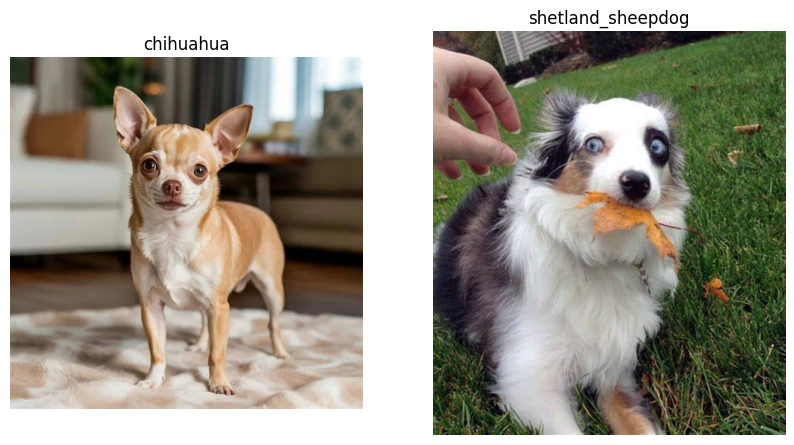

In [82]:
# 1. Upload custom images (if not using Drive)
from google.colab import files
uploaded = files.upload()  # Select your custom images

# 2. Get custom image file paths
custom_image_paths = ["/content/" + fname for fname in uploaded.keys()]
print("Custom image paths:", custom_image_paths)

# 3. Turn custom images into a TensorFlow dataset (test_data=True because no labels)
custom_data = create_data_batches(custom_image_paths, test_data=True)

# 4. Make predictions using your loaded model
custom_preds = loaded_full_model.predict(custom_data)

# 5. Convert predictions to labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
print("Predicted labels:", custom_pred_labels)

# 6. Display each image with its predicted label
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i, img_path in enumerate(custom_image_paths):
    img = plt.imread(img_path)
    plt.subplot(1, len(custom_image_paths), i+1)
    plt.imshow(img)
    plt.title(custom_pred_labels[i])
    plt.axis('off')
plt.show()
